# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd

In [2]:
!pip install summarytools
!pip install skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [3]:
from summarytools import dfSummary
from skimpy import skim

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the Data

In [6]:
df = pd.read_csv('/content/Traffic_Accident.csv') #reading data

In [7]:
df.head() #printing the first 5 rows

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [8]:
df.drop(columns=['Unnamed: 0'] , axis=1 ,inplace=True) #droping (Unnamed: 0) column sicne it is not relevant
df.drop(columns=['Accident_Index'] , axis=1 ,inplace=True) # dropping (Accident_Index)

In [9]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,24/04/2005,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,08/10/2005,7.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,02/04/2005,7.0,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,26/05/2005,5.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,11/01/2005,3.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [10]:
dfSummary(df) #getting summary of data

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Location_Easting_OSGR[float64],Mean (sd) : 439654.1 (66711.8)min < med < max:296780.0 < 429505.0 < 559570.0IQR (CV) : 127900.0 (6.6),"17,791 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACuklEQVR4nO3dT4riQBTH8ZexlbRCggi68wIDs3DpIeawc4RZeAJv4E4QiZjpYEwyi/mDDIPpVKVIvervZ91l1eJH7PfwVaKmaQTw3aehDwC8x8vQB4A/oih6FZGJxUfcmqZ56+s8jwgqRORXSBeLxdckSeamn3G5XM5RFH1zEVaCij8mSZLMt9vtW5qmRdfFWZbFu91ufjqdJiJCUOFWmqbFcrn8Ybj8tdfDPKCYggoEFSoQVKhAUKFCsMXUkD1By72d9SI1CzKoQ/YEbfd22YvULMigyrA9QeO9XfciNQs1qCJi1xOsqioRkSSKoq5Lk7qux2mang33dtaL1CzooJrK83xcluWX9Xo9Go1GnZ6KZVnGVVV9Loriu4iYNs7xD4L6H7fb7SWO4+lmsylWq9W5y9rD4TDf7/fT+/0+cnW+j4igPjGbzTr/63A+n/nqdoA+KlQgqFCBoEIFggoVCCpUIKhQgaBCBYIKFQgqVCCoUIGgQgWCChUIKlQgqFCBoEIFfo+K3lRVNRaz8R2Rlulbgope2IzviLRP3xJU9MJmfOc907deB9XiIoekrutx3+dBO5Pxnd+ejvB4G1SbixyYBA2Pt0EVi4scmAQNj89BFRGzSySYBA0PfVSoQFChgtOvfsvrF6nc8ZezoNpev0jljkcun6hWVz9SueOR86rf9OpHKnc8opiCCgQVKhBUqEBQoQJBhQoEFSoQVKhAUKGC9z/z+2gsB+REAn1FJUH1iO2AnEi4r6gkqB6xGZATCfsVlQTVQxYDciKBvqKSYgoqEFSoQFChAkGFChRTgbHow3o9o0ZQA2LTh/V9Ro2gBsSmD+v7jBpBDZBJH9b3GTWKKajQ+kTl6kf44GlQufoRvmh7onL1I7zgvJjK8zw+Ho/Truuu12tsut5m7ZB7az237fosy+K2v/kJzH6n8tWw8ZsAAAAASUVORK5CYII="">",0(0.0%)
2,Location_Northing_OSGR[float64],Mean (sd) : 338794.3 (115731.1)min < med < max:156110.0 < 361950.0 < 656390.0IQR (CV) : 221792.5 (2.9),"21,409 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACm0lEQVR4nO3dP47aQBSA8TfhjwwoRogVdL5ApBSUNLlBDps2XQr2AtyABiEhY4SzDmCcItloo4UFj20xz/v96h1D8WnxeHjCZFkmgOs+3PsNALdoXvsDY0xHRNqW199nWfZkuRb4581QjTGd4XD41ff9gc3Ft9ttaIz5Rqwo6tp/1Lbv+4PpdPrU7/eTPBeOosibzWaD9XrdFhFCRSFXP/pFRPr9fjIajX5aXL9jsQZ4hc0UVCBUqECoUIFQoQKhQgVChQqEChVueo76HnF07BZCPYOjY/cQ6nkcHTuGUN/A0bE72ExBBUKFCoQKFQgVKhAqVGDXX4E0TVsi4htjbJZzWHAGoZYsjuPW4XD4HARBo9Fo5HoGK8JhwSWEWrL9ft/0PK87mUyS8Xgc5lnLYcFlhFqRXq/HYUGJ2ExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWcPutnth7PnA2V2Xq85Gyowmw9XnA5VBFhth5/sJmCCoQKFQgVKjh/j2qr4CSofzqdWiW/JRRQy1CLToIeDgcvTdNPSZL8EBGbjRxKVstQi0yCiogsFovBfD7vHo/HRhXvD/nVMtRntpOgYRjyaMsxbKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoUKtT6beo7rOmRFqjRSdM9tsNjtjzHcRyf1Fnr8qC51Q68V6zmy5XH58fHz8EgTBg803zkSqHagk1BqymTMLw7BT5BtnVQ9UEir+U+C3B0QqHKgkVMcwmXAeoTqEyYTLCNUhTCZcRqgOYjLhtUpD5X4LZaksVO63UKbKQuV+C2W6KdQoiry8F97tdrnXnBPHsbdarbo2r22ztuj6e62992tHUeSladoU+1u9X1mWXfzk/Q079X+ZQ/szwgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Longitude[float64],Mean (sd) : -1.4 (1.0)min < med < max:-3.6 < -1.6 < 0.4IQR (CV) : 1.9 (-1.5),"48,971 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyUlEQVR4nO3dwY6aQBjA8Y+6GtQEYkz05gs08eDRh+jD9hF68Am8evJGNAYju1REemibmGajC8PU+Wb/v3OxHP5hYWYYgqqqBHDdl2efAPARL88+AbgjCIK+iPQMfuJcVdVbW+dzi1AhIr8jHY/H36IoGjX9jePxeAiC4LuNWAkVf/WiKBotl8u3OI7zugenaRquVqvRfr/viQihwq44jvPJZPLa8PB+qydzg4cpqECoUIFQoQKhQgVChQqEChUIFSowjmqB4VSktWlIzQi1ZaZTkTanITUj1PY1noq0PQ2pGaFaYjAVaW0aUjMepqACoUIFb//0u7wIGPV5Garri4BRn5ehiuOLgFGfr6GKiLuLgFGf16GaKMuyKyJREAR1D42u12vXwil9aoT6jizLukVRzGezWafT6dS6dSiKIizL8mue5z9EpOnVHP8g1Hecz+eXMAwHi8Uin06nhzrHbrfb0Xq9Hlwul46t8/uMCPWO4XBY+x73cDhwb2sBA/5QgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWcXj1l8IIei5c942yoJi/osXjZP86GKgYv6LF42T8uhyoizV7QY/Gyf5wPFXoYvBAp8mDDD0JFK0xeiBR5vOEHoaIVJi9EfmTDD6uhGu7/xBCTQk1eiPzj7nOFtVBN939iiAm3bF5RjfZ/YogJt6zfozbd/4khJtziYcoxhkM8Ip7u60qoDjEd4hHxd19XQnWIyRCPiN/7uhKqgwyGeEQ83deV9ahQgVChAqFCBUKFCoQKFQgVKhAqVGAc1TO+fnaIUD3i82eHCNUjPn92iFA95ONnh3iYggoPr6hsqwMX3A2VbXXgikdX1F4URaP5fC79fv9nnR/e7XbhZrMZpGk6TJLkXPfETqdTKCKSZVmYJMngfx37zP9b63mbHp+mafjo3/wCzFuk9DeVvGAAAAAASUVO

In [11]:
skim(df) #summary of data

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 52000  │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 28     │ │ string      │ 11    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA % ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Location_Easting_OS │    0 │    0 │ 439700 │  66710 │ 296800 │ 388100 │ 429500 │  516000 │ 559600 │ ▂▅▇▆▂▇ │  │
│ │ GR                  │      │      │        │        │        │        │        │         │        │        │  │
│ │ Location_Northing_O │    0 │    0 │ 338800 │ 115700 │ 156100 │ 194200 │ 362000 │  416000 │ 656400 │ ▇▅▇▅▂  │  │
│ │ SGR                 │      │      │        │        │        │        │        │         │        │        │  │
│ │ Longitude           │    0 │    0 │ -1.426 │ 0.9755 │ -3.597 │  -2.18 │ -1.553 │ -0.3129 │ 0.3502 │ ▁▅▇▇▂▇ │  │
│ │ Latitude            │    0 │    0 │  52.94 │  1.045 │  51.29 │  51.63 │  53.15 │   53.64 │   55.8 │ ▇▅▇▆▂  │  │
│ │ Police_Force        │    0 │    0 │   11.1 │  9.558 │      1 │      1 │     10 │      20 │     48 │  ▇▃▃▁  │  │
│ │ Accident_Severity   │    0 │    0 │  2.848 │ 0.3909 │      1 │      3 │      3 │       3 │      3 │    ▁ ▇ │  │
│ │ Number_of_Vehicles  │  802 │ 1.54 │  1.843 │ 0.7081 │      1 │      1 │      2 │       2 │     18 │   ▇    │  │
│ │ Number_of_Casualtie │    0 │    0 │  1.359 │ 0.8042 │      1 │      1 │      1 │       1 │     23 │   ▇    │  │
│ │ s                   │      │      │        │        │        │        │        │         │        │        │  │
│ │ Day_of_Week         │  537 │ 1.03 │   4.12 │  1.934 │      1 │      2 │      4 │       6 │      7 │ ▃▃▃▃▃▇ │  │
│ │ Local_Authority_(Di │    1 │    0 │  155.1 │  114.2 │      1 │     32 │    142 │     254 │    570 │  ▇▅▅▅  │  │
│ │ strict)             │      │      │        │        │        │        │        │         │        │        │  │
│ │ 1st_Road_Class      │    1 │    0 │  4.084 │  1.415 │      1 │      3 │      3 │       6 │      6 │ ▁ ▇▂▂▅ │  │
│ │ 1st_Road_Number     │    1 │    0 │   1026 │   1883 │      0 │      0 │     74 │     642 │   9999 │  ▇  ▁  │  │
│ │ Speed_limit         │ 1041 │    2 │  36.77 │  12.71 │     20 │     30 │     30 │      40 │     70 │  ▇▁ ▁▁ │  │
│ │ 2nd_Road_Class      │    1 │    0 │  2.933 │  3.139 │     -1 │     -1 │      4 │       6 │      6 │ ▆  ▂▁▇ │  │
│ │ 2nd_Road_Number     │    1 │    0 │  340.9 │   1206 │     -1 │      0 │      0 │       0 │   9711 │   ▇    │  │
│ │ Urban_or_Rural_Area │    1 │    0 │   1.25 │  0.433 │      1 │      1 │      1 │       1 │      3 │  ▇  ▃  │  │
│ │ Year                │    1 │    0 │   2005 │      0 │   2005 │   2005 │   2005 │    2005 │   2005 │     ▇  │  │
│ └─────────────────────┴──────┴──────┴────────┴────────

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

<Axes: >

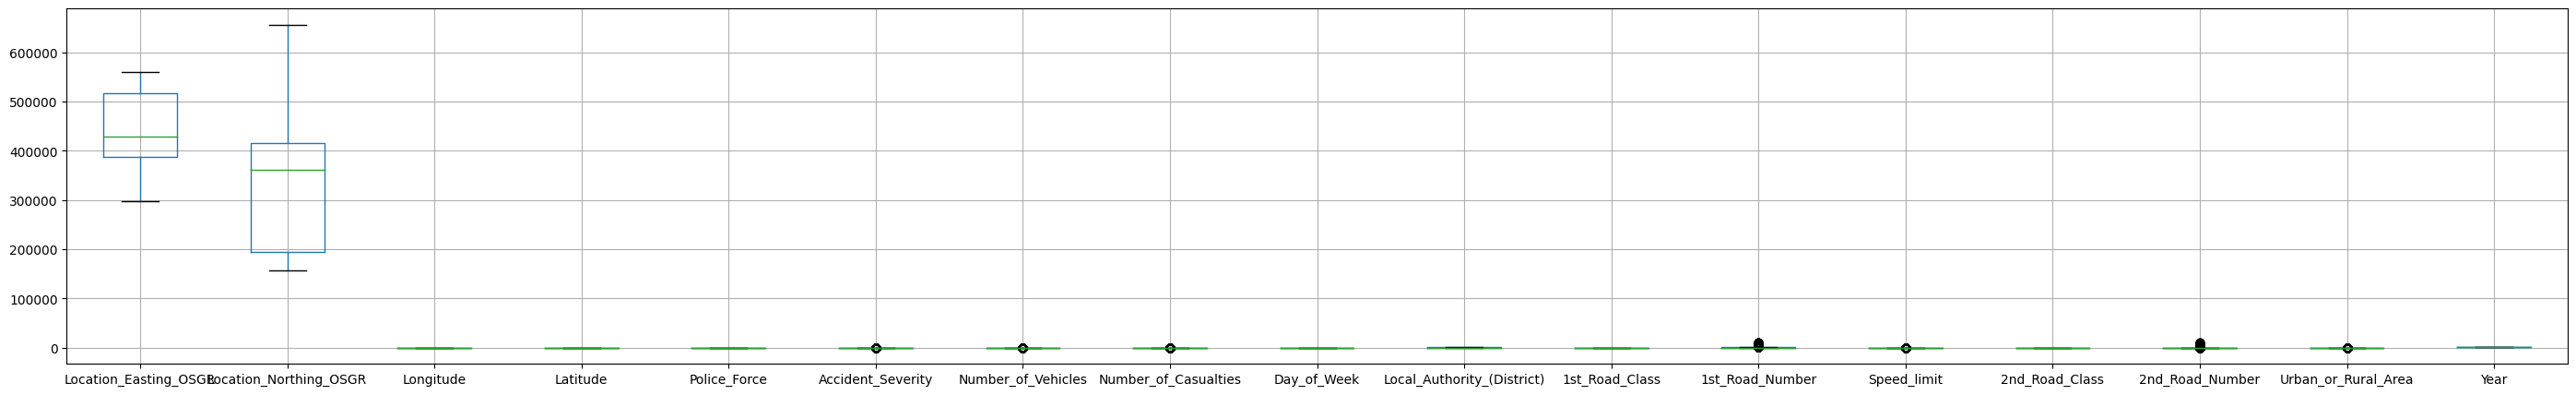

In [12]:
# finding outliers
df.boxplot(figsize=(35,5))

In [13]:
def remove_outliers(df , col): #function to remove outliers
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 *iqr
  upper = q3 + 1.5 * iqr
  df = df[(df[col] >= lower) & (df[col] <= upper)]
  return df
# i don't think that we need to remove outliers

In [14]:
#finding nulls
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0
Date,0
Day_of_Week,537


In [15]:
# fill Number_of_Vehicles with median
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median() , inplace = True)

# fill day of the week with mode
df['Day_of_Week'].fillna(df['Day_of_Week'].mode() , inplace=True)

#fill speed limit with mean
df['Speed_limit'].fillna(df['Speed_limit'].mean() , inplace= True)

#fill time with mode
df['Time'].fillna(df['Time'].mode() , inplace=True)

df.dropna(inplace=True) # i will drop the rest since it will not make big difference (they are 56 rows) and thers not need to fill them

df.isnull().sum() #check after everything

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [18]:
# encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# LabelEncoder to each categorical column
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Accident_Severity', ylabel='Longitude'>

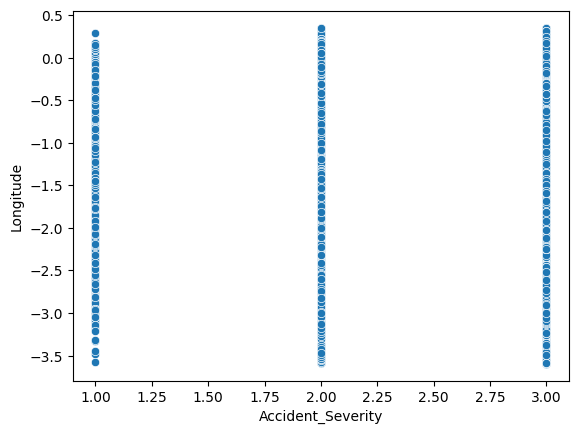

In [16]:
sns.scatterplot(data=df , x='Accident_Severity' , y='Longitude')

<Axes: xlabel='Accident_Severity', ylabel='Latitude'>

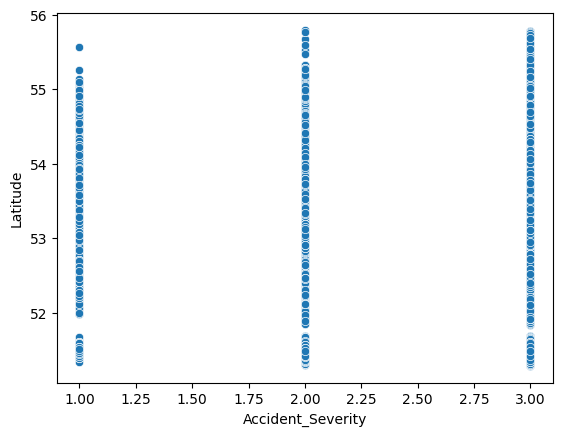

In [17]:
sns.scatterplot(data=df , x='Accident_Severity' , y='Latitude')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [20]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

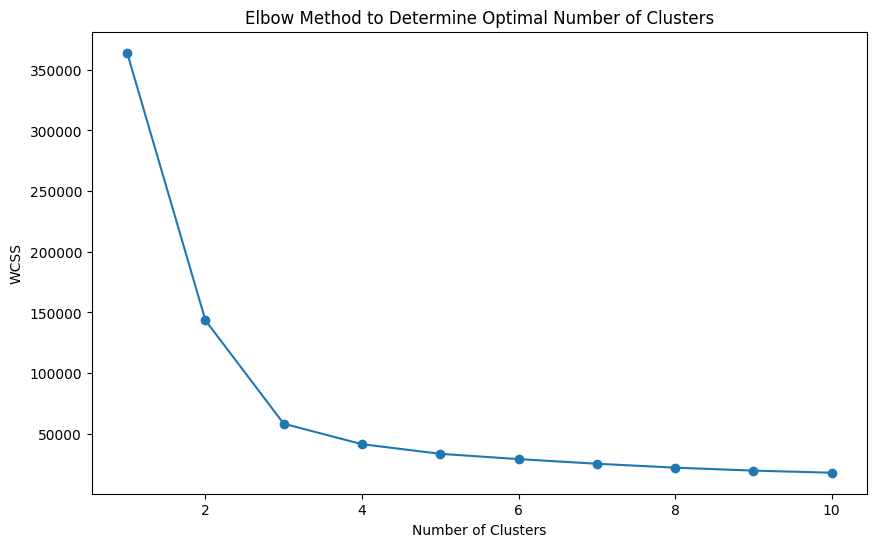

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [23]:
sil_score = silhouette_score(df_pca, clusters)
print(f'Silhouette Score for {optimal_clusters} clusters: {sil_score}')

Silhouette Score for 3 clusters: 0.618799676725595


## Plot the data points with their predicted cluster center

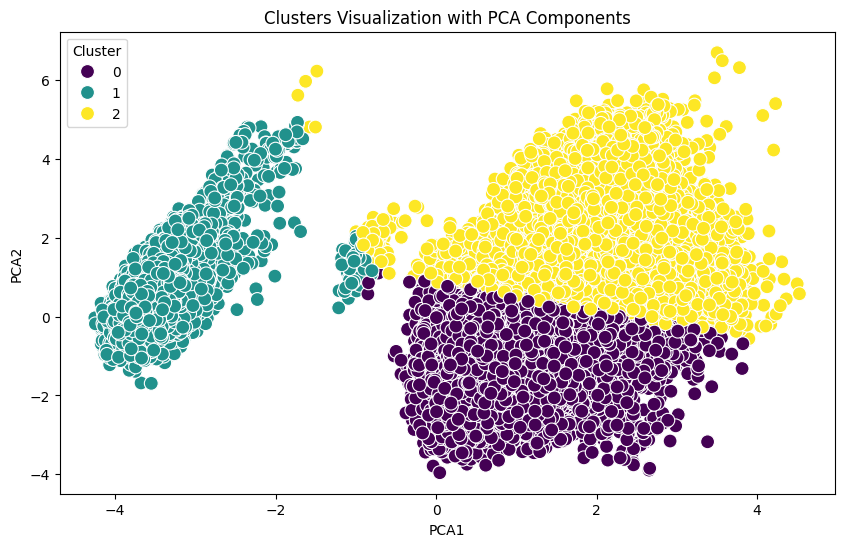

In [24]:
df_pca['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Clusters Visualization with PCA Components')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

## **Answers:**

**Justify Feature Selection**

i did (PCA) to reduce the dataset dimensions to 2 components. this captures the most importent featurse which in its turn simplify data and makeing clustring more effective without manually selecting features

**Number of Clusters Choices**

I used the (elbow method) to find optimal number of clusters. the elbow point apppeared at 3 which means 3 clusters is the optimal clusters

**Evaluation**

1&2-

I used the Silhouette Score to evaluate the clustering results.
Silhouette Score measures/shows how well each point fits within its cluster. high score indicate well defined and distinct clusters.

**Improvements and Recommendations**

Future improvements could include using (DBSCAN) for more complex cluster shapes and maybe using t-SNE for advanced dimensionality reduction techniques. also maybe adding more features, such as weather conditions, might enhance clustering accuracy